# Titanic Project

In [147]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [148]:
df=pd.read_csv("Titanic_dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [149]:
df.shape
#Rows=891
#Columns=12

(891, 12)

In [150]:
#Check null values & data type
df.info()
# Null values are present in dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [151]:
#Number of null values in dataset
df.isnull().sum()
#Observation:
#Null values in following columns
#Age=177 , Cabin=687, Embarked=2

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [152]:
#Check target count of target variable
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# EDA

<AxesSubplot:>

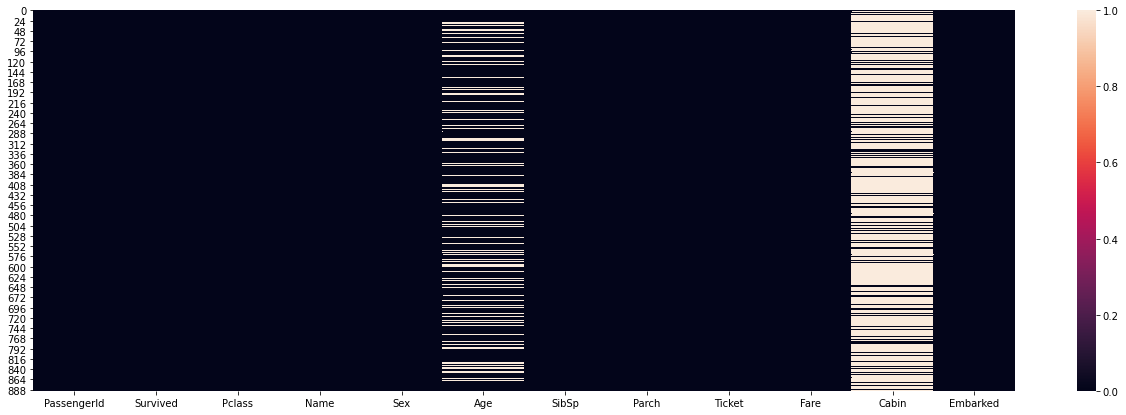

In [153]:
#Uni-variate analysis
#Check for null values
plt.figure(figsize=(22,7))
sns.heatmap(df.isnull(),)

<AxesSubplot:xlabel='Sex', ylabel='count'>

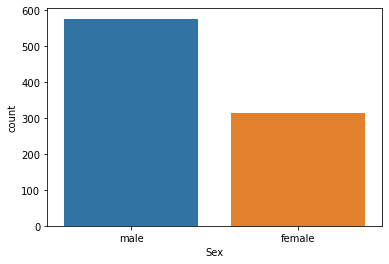

In [154]:
sns.countplot(x="Sex",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

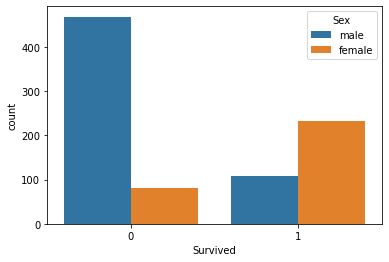

In [155]:
#Check target variables
sns.countplot(x="Survived",data=df,hue="Sex")

3    491
1    216
2    184
Name: Pclass, dtype: int64

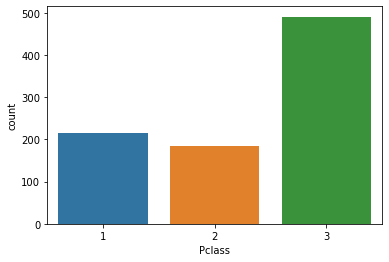

In [156]:
sns.countplot(x="Pclass",data=df)
df["Pclass"].value_counts()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

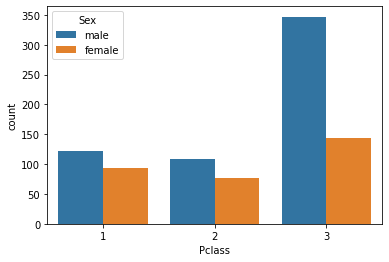

In [157]:
sns.countplot(x="Pclass",data=df,hue="Sex")

<AxesSubplot:xlabel='Survived', ylabel='count'>

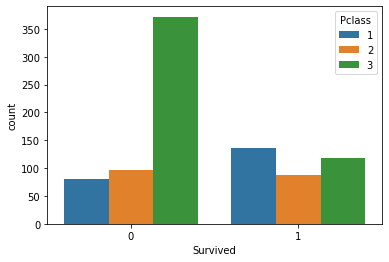

In [158]:
sns.countplot(x="Survived",data=df,hue="Pclass")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

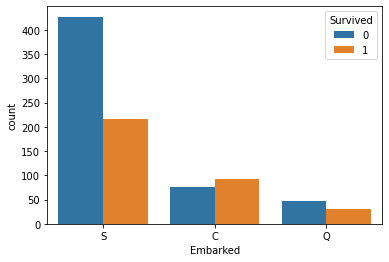

In [159]:
sns.countplot(x="Embarked",data=df,hue="Survived")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

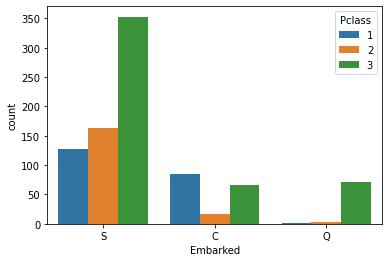

In [160]:
sns.countplot(x="Embarked",data=df,hue="Pclass")

<AxesSubplot:xlabel='Age', ylabel='Count'>

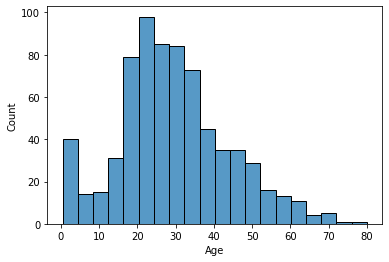

In [161]:
sns.histplot(x="Age",data=df)

<AxesSubplot:ylabel='Frequency'>

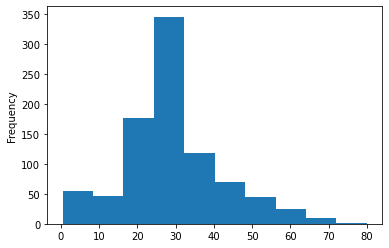

In [180]:
#Data distribution of numerical features
df["Age"].plot.hist()
#Data is normally distributed

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

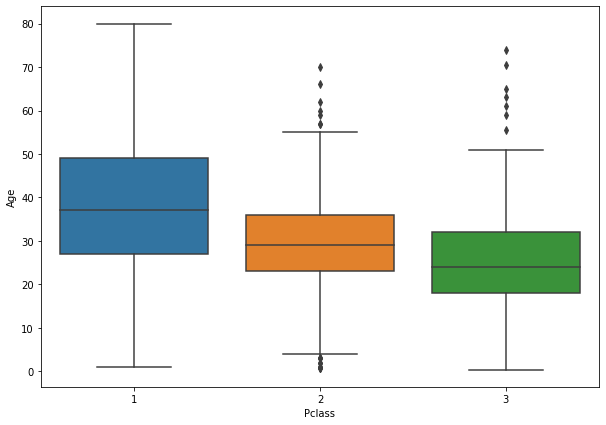

In [162]:
#Bivariate Analysis
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=df)

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

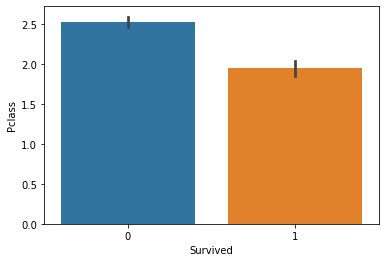

In [163]:
sns.barplot(y="Pclass",x="Survived",data=df)

# Feature Engineering

In [164]:
#Treating null values in "Age" by replaceing with mean values
df["Age"].fillna(int((df["Age"].mean())),inplace=True)

In [165]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [166]:
#Check null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [167]:
#Feature Engineering
#By adding SibSp & Parch, family size can be found.
df["Family"]=df["SibSp"]+df["Parch"]

<AxesSubplot:xlabel='Family', ylabel='count'>

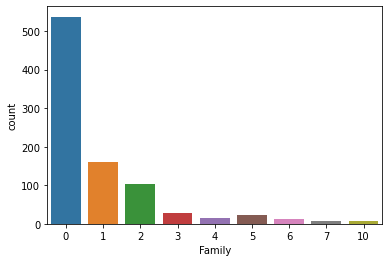

In [168]:
sns.countplot(x="Family",data=df)

<AxesSubplot:xlabel='Family', ylabel='count'>

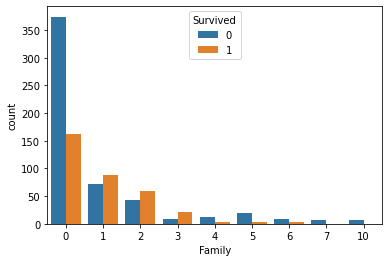

In [169]:
sns.countplot(x="Family",data=df,hue="Survived")

In [170]:
#To handle null values in "Cabin":
#Feature values being object datatype, it cannot be replaced by mode as the cabin number are unique.
#Cabin location in ship depends on whether its first,second or third class which further influences the chances of survival.
#From data,the cabin numbers are not distrubuted poroperly w.r.t Pclass. Hence there is no substantial data to fill the
  #missing values.
#Cabin column shall be dropped.
#As sip & Parch are combined into family, SibSp & Parch can be dropped
#Columns: PasengerID,Name,Ticket shall be dropped as they hardly contribute logically.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [171]:
dfnew=df.drop(columns=["PassengerId","Name","SibSp","Parch","Ticket","Cabin","Embarked"])
dfnew.head()

,Survived,Pclass,Sex,Age,Fare,Family
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,1
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,1
4,0,3,male,35.0,8.0500,0


In [172]:
dfnew.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Family      0
dtype: int64

In [173]:
dfnew.shape

(891, 6)

In [174]:
#Split data into independent & dependent variables
df_x=dfnew.drop(columns=["Survived"])
y=dfnew["Survived"]
print(x.shape,y.shape)

(891, 5) (891,)


In [175]:
df_x.head()

,Pclass,Sex,Age,Fare,Family
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [143]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [176]:
#Convert the input into integers using get_dummies
df_x=pd.get_dummies(df_x,drop_first=True)
df_x

,Pclass,Age,Fare,Family,Sex_male
0,3,22.0,7.2500,1,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,0,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
...,...,...,...,...,...
886,2,27.0,13.0000,0,1
887,1,19.0,30.0000,0,0
888,3,29.0,23.4500,3,0
889,1,26.0,30.0000,0,1


In [185]:
#Lets bring input dataset features to same scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

# Check Best Random State

In [188]:
#Lets use f1-score,confusion matrix & classification report as metrics 
from sklearn.metrics import f1_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
def maxf1_score(clf,df_x,y):
    maxf1=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=f1_score(y_test,y_pred)
        if tmp>maxf1:
            maxf1=tmp
            rs=r_state
    print("Maximum f1_score is at random state :",rs," and it is :",maxf1)
    print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
    print("Classification report \n",classification_report(y_test,y_pred))

# 1.Logistic Regression

In [189]:
from sklearn.linear_model import LogisticRegression
lg_clf=LogisticRegression()
maxf1_score(lg_clf,x,y)

Maximum f1_score is at random state : 65  and it is : 0.8085106382978724
Confusion matrix 
 [[90 20]
 [17 52]]
Classification report 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       110
           1       0.72      0.75      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.79       179



In [195]:
#Lets use cross_val_score and evaluate the logistic regression model
from sklearn.model_selection import cross_val_score
cv=cross_val_score(lg_clf,x,y,cv=5,scoring="f1")
print("Mean f1 score for logistic classifier: ",cv.mean())
print("Standard deviation in accuracy score for logistic classifier: ",cv.std())
print(cv)

Mean f1 score for logistic classifier:  0.7182578414596771
Standard deviation in accuracy score for logistic classifier:  0.021453253005133458
[0.72857143 0.72058824 0.71111111 0.68292683 0.7480916 ]


# 2. KNN Classifier

In [196]:
#K-Nearest Neighbor Classifier
#For KNN we need to know the best value of k using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 7}

In [197]:
kc=KNeighborsClassifier(n_neighbors=7)
maxf1_score(kc,x,y)

Maximum f1_score is at random state : 88  and it is : 0.8636363636363636
Confusion matrix 
 [[96 14]
 [17 52]]
Classification report 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       110
           1       0.79      0.75      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



In [198]:
#Lets use cross_val_score and evaluate the knn model
from sklearn.model_selection import cross_val_score
cv_kc=cross_val_score(kc,x,y,cv=5,scoring="f1")
print("Mean f1 score for knn classifier: ",cv_kc.mean())
print("standard deviation in accuracy score for knn classifier: ",cv_kc.std())
print(cv_kc)

Mean f1 score for knn classifier:  0.7549565923085882
standard deviation in accuracy score for knn classifier:  0.024686680361706088
[0.73134328 0.72180451 0.7761194  0.76033058 0.78518519]


# 3.Decision Tree CLassifier

In [199]:
#Decision tree classifier
#Hyper parameter tuning 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dt_clf=DecisionTreeClassifier()
clf = GridSearchCV(dt_clf, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [201]:
#Decision tree Classifier
dt=DecisionTreeClassifier(criterion="gini",max_depth=8)
maxf1_score(dt,x,y)

Maximum f1_score is at random state : 88  and it is : 0.8124999999999999
Confusion matrix 
 [[97 13]
 [17 52]]
Classification report 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       110
           1       0.80      0.75      0.78        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [203]:
#Lets use cross_val_score and evaluate the Decision tree classifier
from sklearn.model_selection import cross_val_score
cv_dt=cross_val_score(dt,x,y,cv=5,scoring="f1")
print("Mean f1 score for Decision tree classifier: ",cv_dt.mean())
print(cv_dt)

Mean f1 score for Decision tree classifier:  0.7485394918046374
[0.74603175 0.74193548 0.7804878  0.71666667 0.75757576]


# 4. Support Vector Classifier

In [204]:
#Support Vector Classifier
#Check best parameter for SVC (Hyper parameter tuning )
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [206]:
svc=SVC(kernel="rbf",C=1)
maxf1_score(svc,x,y)

Maximum f1_score is at random state : 65  and it is : 0.8571428571428571
Confusion matrix 
 [[97 13]
 [16 53]]
Classification report 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       110
           1       0.80      0.77      0.79        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



In [221]:
#Lets use cross_val_score and evaluate the Support Vector classifier
from sklearn.model_selection import cross_val_score
cv_svc=cross_val_score(svc,x,y,cv=5,scoring="f1")
print("Mean f1 score for Support Vector classifier: ",cv_svc.mean())
print(cv_svc)

Mean f1 score for Support Vector classifier:  0.7544571064365687
[0.76691729 0.74015748 0.74418605 0.71186441 0.80916031]


# 5.Random Forest Classifier

In [208]:
#Random forest classifier
##Hyper parameter tuning 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'n_estimators': 500}

In [209]:
rf_clf=RandomForestClassifier(n_estimators=500)
maxf1_score(rf_clf,x,y)

Maximum f1_score is at random state : 88  and it is : 0.8405797101449275
Confusion matrix 
 [[98 12]
 [14 55]]
Classification report 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       110
           1       0.82      0.80      0.81        69

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.85      0.85      0.85       179



In [220]:
#Evaluate Random forest classifier by cross validation
from sklearn.model_selection import cross_val_score
cv_rf=cross_val_score(rf_clf,x,y,cv=5,scoring="f1")
print("Mean f1 score for Random forest classifier: ",cv_rf.mean())
print(cv_rf)

Mean f1 score for Random forest classifier:  0.759201645922331
[0.71111111 0.76335878 0.79389313 0.7107438  0.81690141]


# 6. AdaBoost Classifier

In [217]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
parameters= { 'n_estimators': [50, 100],'learning_rate' : [0.01,0.05,0.1,0.3,1],'algorithm' : ['SAMME', 'SAMME.R']}
 
rgr = RandomizedSearchCV(AdaBoostClassifier(),param_distributions=parameters ,cv=3,n_iter = 10,n_jobs=-1)
rgr.fit(x,y)
rgr.best_params_

{'n_estimators': 50, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

In [218]:
adr=AdaBoostClassifier(n_estimators=50,algorithm="SAMME.R",learning_rate=0.1)
maxf1_score(adr,x,y)

Maximum f1_score is at random state : 65  and it is : 0.8307692307692308
Confusion matrix 
 [[93 17]
 [15 54]]
Classification report 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       110
           1       0.76      0.78      0.77        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [219]:
#Evaluate AdaBoost classifier by cross validation
from sklearn.model_selection import cross_val_score
cv_ada=cross_val_score(adr,x,y,cv=5,scoring="f1")
print("Mean f1 score for AdaBoost classifier: ",cv_ada.mean())
print(cv_ada)

Mean f1 score for AdaBoost classifier:  0.7330802916935247
[0.76119403 0.75757576 0.73846154 0.68376068 0.72440945]


In [250]:
#Result
result=pd.DataFrame({"Classifier Model":["Logistic Regression","K-Nearest Neighbour","Decision Tree","Support Vector",
                                         "Random Forest","AdaBoost"],
                     "Random State":[65,88,88,65,88,65],
                     "F1":[0.81,0.86,0.81,0.85,0.84,0.83],
                    "Cross Validation":[0.72,0.75,0.75,0.75,0.76,0.73]})
result["Difference"]=result["F1"]-result["Cross Validation"]
result

,Classifier Model,Random State,F1,Cross Validation,Difference
0,Logistic Regression,65,0.81,0.72,0.09
1,K-Nearest Neighbour,88,0.86,0.75,0.11
2,Decision Tree,88,0.81,0.75,0.06
3,Support Vector,65,0.85,0.75,0.10
4,Random Forest,88,0.84,0.76,0.08
5,AdaBoost,65,0.83,0.73,0.10


#  ROC Curve

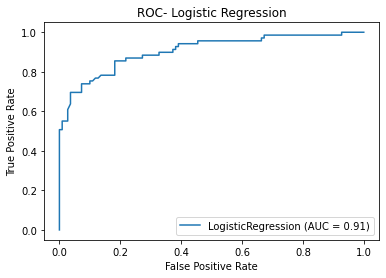

In [249]:
#AUC-ROC Curve-Logistic regression
from sklearn.metrics import plot_roc_curve
lg_disp = plot_roc_curve(lg_clf, x_test, y_test)
plt.title("ROC- Logistic Regression")
plt.show()

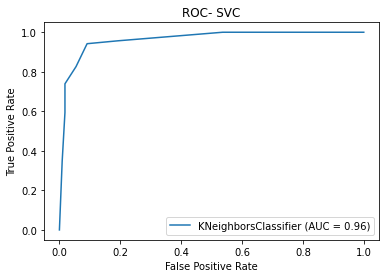

In [247]:
#AUC-ROC Curve- KNN Classifier
from sklearn.metrics import plot_roc_curve
knn_disp = plot_roc_curve(kc, x_test, y_test)
plt.title("ROC- SVC")
plt.show()

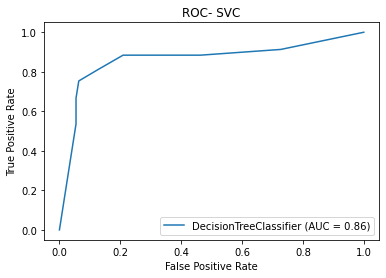

In [246]:
#AUC-ROC Curve (Decision Tree)
from sklearn.metrics import plot_roc_curve
dt_disp = plot_roc_curve(dt, x_test, y_test)
plt.title("ROC- SVC")
plt.show()

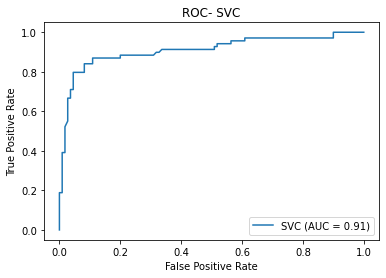

In [242]:
#AUC-ROC Curve (Support Vector)
from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(svc, x_test, y_test)
plt.title("ROC- SVC")
plt.show()

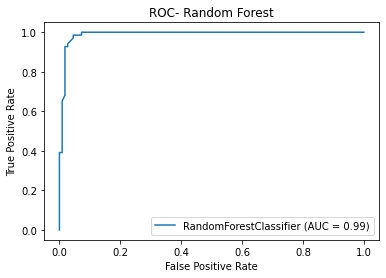

In [245]:
#AUC-ROC Curve (Random Forest)
from sklearn.metrics import plot_roc_curve
rf_clf_disp = plot_roc_curve(rf_clf, x_test, y_test)
plt.title("ROC- Random Forest")
plt.show()


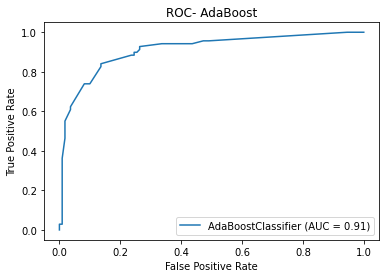

In [244]:
#AUC-ROC Curve (AdaBoost)
from sklearn.metrics import plot_roc_curve
adr_disp = plot_roc_curve(adr, x_test, y_test)
plt.title("ROC- AdaBoost")
plt.show()

# Random forest is best performing model with AUC=0.99

In [259]:
#Saving the best model
#Random state=88
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 88,test_size=0.20,stratify=y)
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
      
print("F1 score=",f1_score(y_test,y_pred))
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("Classification report \n",classification_report(y_test,y_pred))

F1 score= 0.8529411764705882
Confusion matrix 
 [[101   9]
 [ 11  58]]
Classification report 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       110
           1       0.87      0.84      0.85        69

    accuracy                           0.89       179
   macro avg       0.88      0.88      0.88       179
weighted avg       0.89      0.89      0.89       179



In [261]:
#Saving the best model
import joblib
joblib.dump(rf,'Titanic_classifier.joblib')

['Titanic_classifier.joblib']